In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data= pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

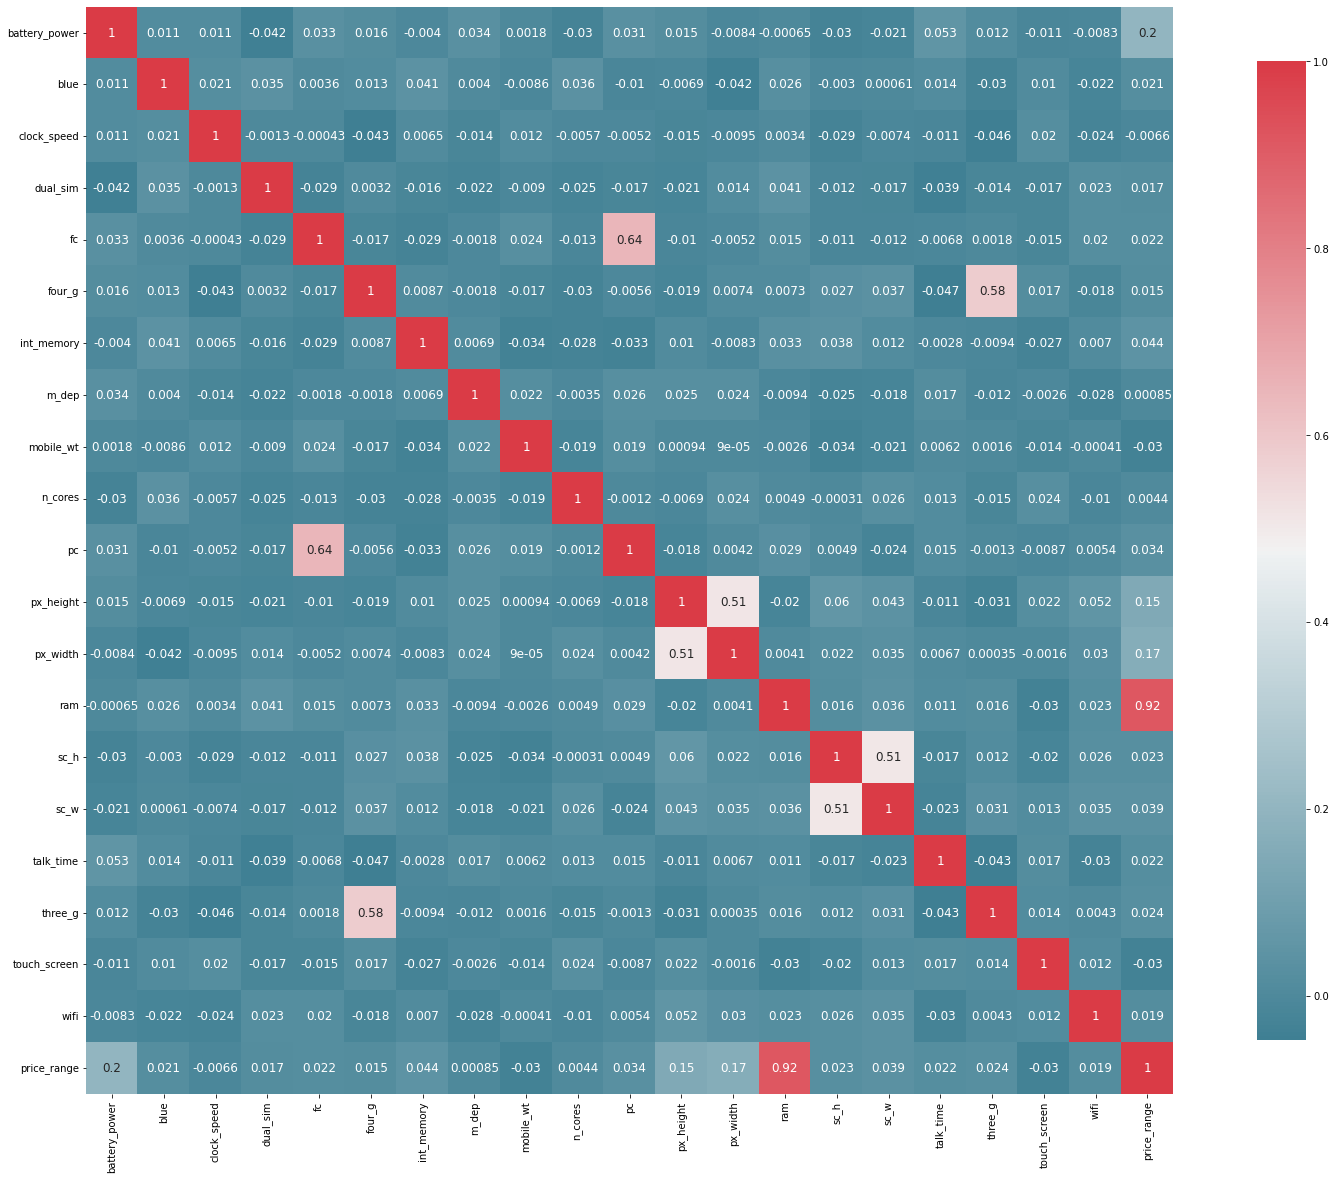

In [7]:
 plot_correlation_map(data)

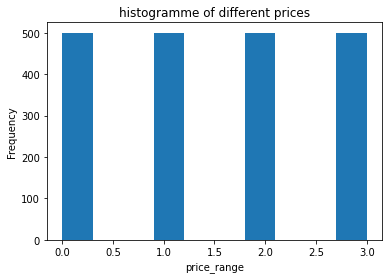

In [8]:
plt.title("histogramme of different prices")
plt.xlabel("price_range")
data['price_range'].plot.hist()

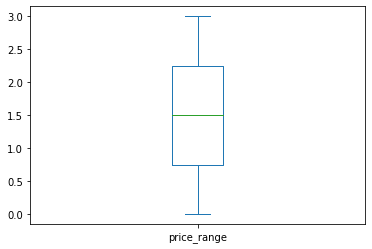

In [9]:
data['price_range'].plot.box()

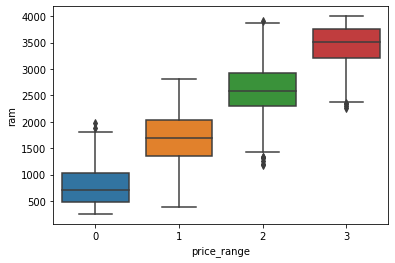

In [12]:
sns.boxplot(x= 'price_range' , y= 'ram', data=data)

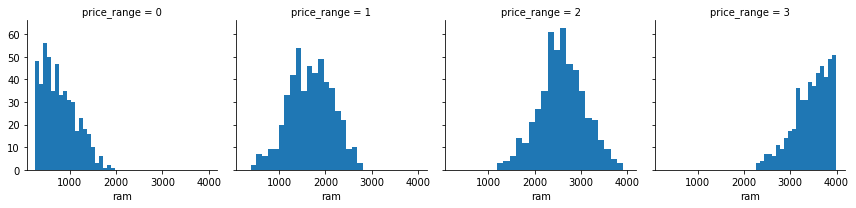

In [11]:
g=sns.FacetGrid(data, col= 'price_range')
g.map(plt.hist, 'ram', bins=20)

In [65]:
from sklearn.model_selection import train_test_split
y=data['price_range']
x=data.drop('price_range' , axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=30)

In [66]:
from sklearn.neighbors import KNeighborsClassifier



model=KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.925


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
dtree = tree.DecisionTreeClassifier (criterion = "gini", splitter = 'random', max_leaf_nodes = 10,
                                     min_samples_leaf = 6, max_depth= 4)

In [36]:
x=data.drop(["price_range"], axis=1)
y= data["price_range"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5,random_state=20)

#applying tree algorithm
treeA = DecisionTreeClassifier()  
treeA.fit(x_train, y_train)   #fitting our model
y_pred=treeA.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.822


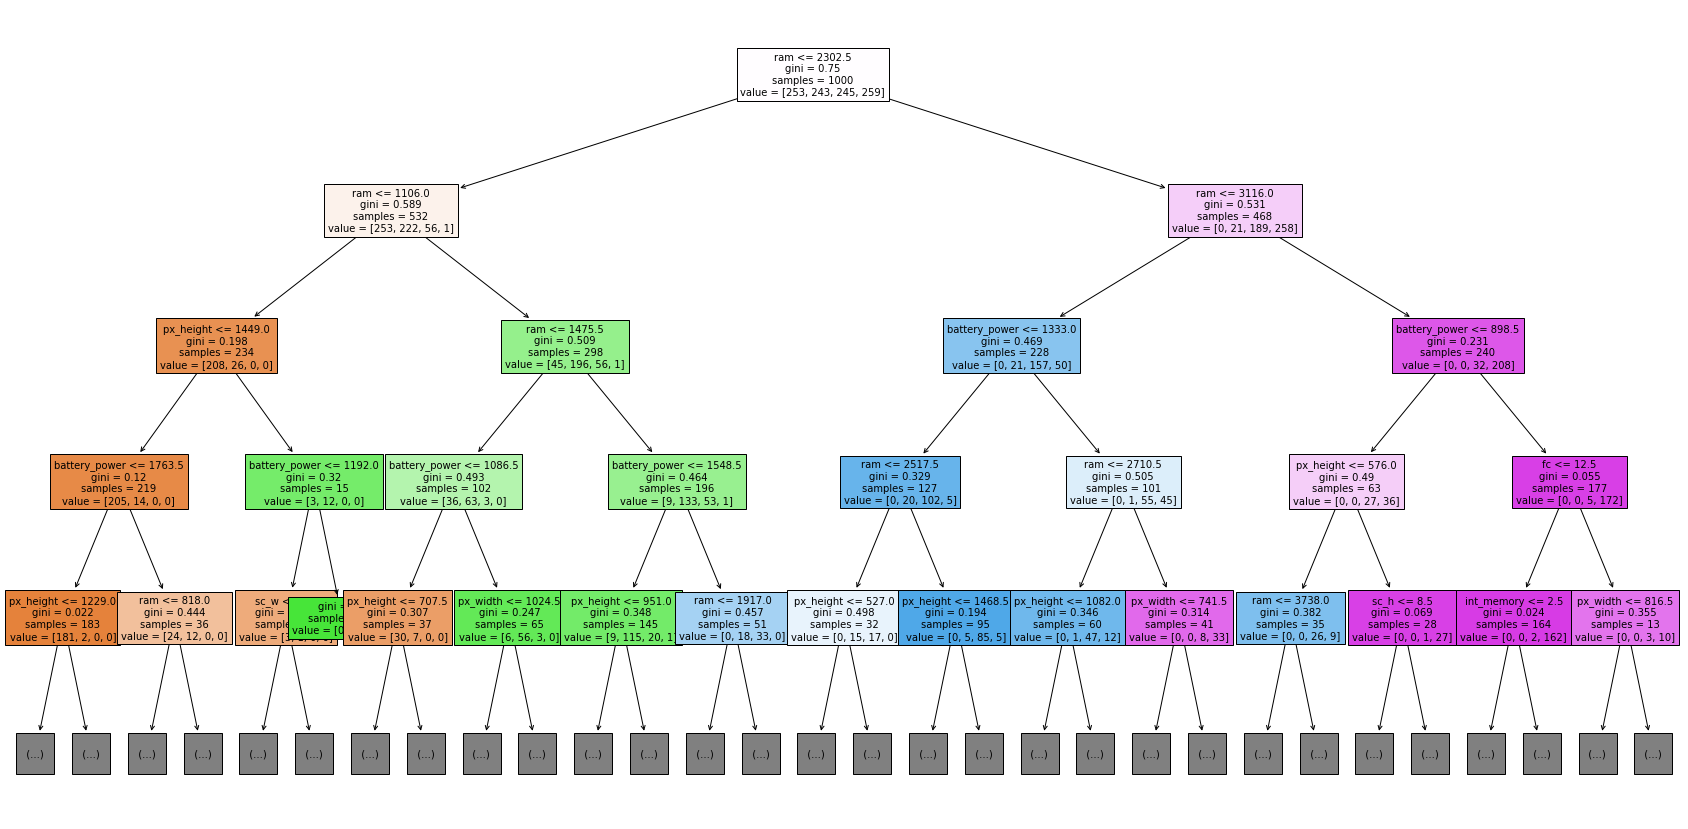

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
from sklearn import tree
graph=tree.plot_tree(treeA, fontsize=10, filled=True, max_depth=4, feature_names=x.columns)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [81]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(x)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [82]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,1
...,...
1995,1
1996,1
1997,0
1998,1


In [83]:
agglomerative["price"]=data["price_range"]

dico={0: "r5is",
      1: "metwasset", 
      2: "ghali", 
      3: "super ghali"}

agglomerative["price"].replace(dico, inplace=True)

agglomerative.rename(columns = {0:'cluster'}, inplace=True)


In [84]:
agglomerative

,cluster,price
0,0,metwasset
1,0,ghali
2,0,ghali
3,0,ghali
4,1,metwasset
...,...,...
1995,1,r5is
1996,1,ghali
1997,0,super ghali
1998,1,r5is


In [85]:
pd.crosstab(agglomerative["price"], agglomerative["cluster"])

cluster,0,1
price,,
ghali,368,132
metwasset,113,387
r5is,0,500
super ghali,499,1


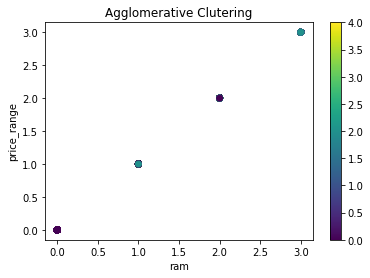

In [44]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data['price_range'] , data["price_range"] , c= agglomerative[0])
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("ram")
ax.set_ylabel("price_range")
plt.colorbar(scatter)

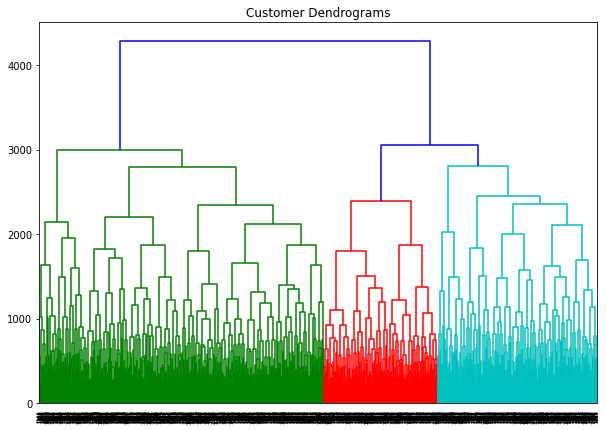

In [68]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(x, method="complete"))

In [96]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

In [53]:
kmeans.inertia_

1245556551.7746575

In [54]:
kmeans.score(data)

-1245556551.7746577

In [97]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,0
2,0
3,0
4,1
...,...
1995,1
1996,1
1997,0
1998,1


In [94]:
labels["price"]=data["price_range"]

dico={0: "r5is",
      1: "metwasset", 
      2: "ghali", 
      3: "super ghali"}

labels["price"].replace(dico, inplace=True)
labels.rename(columns = {0:'cluster'}, inplace=True)

In [95]:
pd.crosstab(labels["price"], labels["cluster"])

cluster,0,1,2,3
price,,,,
ghali,245,0,134,121
metwasset,213,134,153,0
r5is,15,478,7,0
super ghali,13,0,32,455


In [56]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[1.22817490e+03 5.10288066e-01 1.50390947e+00 5.06172840e-01
  4.47736626e+00 5.30864198e-01 3.19074074e+01 4.83744856e-01
  1.38117284e+02 4.58230453e+00 1.02263374e+01 4.04222222e+02
  1.00842181e+03 2.31155761e+03 1.22057613e+01 5.85185185e+00
  1.14197531e+01 7.86008230e-01 5.12345679e-01 4.97942387e-01
  1.52674897e+00]
 [1.24059641e+03 4.78758170e-01 1.55408497e+00 4.78758170e-01
  4.15196078e+00 5.21241830e-01 3.12271242e+01 4.99183007e-01
  1.40828431e+02 4.50000000e+00 9.61601307e+00 5.60281046e+02
  1.19428268e+03 8.51045752e+02 1.22696078e+01 5.56372549e+00
  1.07124183e+01 7.41830065e-01 5.14705882e-01 4.91830065e-01
  2.18954248e-01]
 [1.23694172e+03 4.66257669e-01 1.47944785e+00 4.96932515e-01
  4.26993865e+00 4.90797546e-01 3.21687117e+01 5.32822086e-01
  1.40825153e+02 4.59202454e+00 9.81288344e+00 1.16473313e+03
  1.65237423e+03 1.87369018e+03 1.24325153e+01 5.85276074e+00
  1.12269939e+01 7.76073620e-01 5.03067485e-01 5.21472393e-01
  1.58588957e+00]
 [1.24593056e+03

In [98]:
data["clusters"]=labels

In [100]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,1


In [101]:
y=data['price_range']
x=data.drop('price_range' , axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=30)

model=KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.925


In [62]:
pip install 'neptune-contrib[monitoring]>=0.24.9'

     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 316 kB 24.9 MB/s 
     |████████████████████████████████| 100 kB 10.3 MB/s 
     |████████████████████████████████| 106 kB 55.6 MB/s 
     |████████████████████████████████| 133 kB 62.1 MB/s 
     |████████████████████████████████| 175 kB 66.8 MB/s 
     |████████████████████████████████| 584 kB 48.1 MB/s 
     |████████████████████████████████| 925 kB 43.9 MB/s 
     |████████████████████████████████| 829 kB 63.9 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 181 kB 66.2 MB/s 
     |████████████████████████████████| 132 kB 75.8 MB/s 
     |████████████████████████████████| 8.8 MB 42.6 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 138 kB 51.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 140 kB 57.9 MB/s 
     |████████████████

In [63]:
import neptune
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# here you import `neptune_calback` that does the magic (the open source magic :)
from neptunecontrib.monitoring.xgboost_monitor import neptune_callback

/usr/local/lib/python3.7/dist-packages/neptunecontrib/monitoring/xgboost_monitor.py:21: UserWarning: neptunecontrib.monitoring.xgboost_monitor was moved to neptunecontrib.monitoring.xgboost
neptunecontrib.monitoring.xgboost_monitor will be removed in future releases.

  warnings.warn(message)
